## This is a simple project for getting started with ML in finance

**Some useful libraries:**

Download market data from Yahoo! Finance's API - https://pypi.org/project/yfinance/
Main components
1) Ticker: single ticker data
2) Tickers: multiple tickers' data
3) download: download market data for multiple tickers
4) Market: get information about a market
5) WebSocket and AsyncWebSocket: live streaming data
6) Search: quotes and news from search
7) Sector and Industry: sector and industry information
8) EquityQuery and Screener: build query to screen market


In [1]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
# 1. Download the data
# We'll use yfinance to get historical data for a specific stock (Apple in this case).
# You can change 'AAPL' for apple or 'GOOG' for google to any other stock ticker you want to analyze.
print("Downloading historical data for AAPL...")
data_2018_2023 = yf.download('AAPL', start='2018-01-01', end='2023-01-01')
data_2020_2023 = yf.download('AAPL', start='2020-01-01', end='2023-01-01')

# 1. Check the data
print("Data downloaded successfully. Here's a preview:")
print(data_2018_2023.head())
print(data_2020_2023.head())

/var/folders/kr/gft6qzsx1pd7p6nqyq9g3wd00000gn/T/ipykernel_44643/1010859221.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data_2018_2023 = yf.download('AAPL', start='2018-01-01', end='2023-01-01')
[*********************100%***********************]  1 of 1 completed
/var/folders/kr/gft6qzsx1pd7p6nqyq9g3wd00000gn/T/ipykernel_44643/1010859221.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data_2020_2023 = yf.download('AAPL', start='2020-01-01', end='2023-01-01')
[*********************100%***********************]  1 of 1 completed

Data downloaded successfully. Here's a preview:
Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2018-01-02  40.426826  40.436216  39.722772  39.933990  102223600
2018-01-03  40.419788  40.964259  40.356426  40.490195  118071600
2018-01-04  40.607529  40.710791  40.384579  40.492532   89738400
2018-01-05  41.069866  41.156698  40.612231  40.703758   94640000
2018-01-08  40.917316  41.213018  40.818746  40.917316   82271200
Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.620850  72.681296  71.373226  71.627100  135480400
2020-01-03  71.914818  72.676447  71.689957  71.847118  146322800
2020-01-06  72.487839  72.526526  70.783241  71.034702  118387200
2020-01-07  72.146935  72.75

In [3]:
# 2. Prepare the data for the model
# We'll create a simple feature and target.
# The 'feature' (X) will be today's closing price.
# The 'target' (y) will be the closing price of the next day.
# We need to shift the 'Close' column up by one day to create this target.
data_2018_2023['Next_Close'] = data_2018_2023['Close'].shift(-1)
data_2020_2023['Next_Close'] = data_2020_2023['Close'].shift(-1)

# Drop the last row because it will have a 'NaN' value for 'Next_Close'
data_2018_2023.dropna(inplace=True)
data_2020_2023.dropna(inplace=True)
print("Data preparation complete. Here's a preview of the prepared data:")


Data preparation complete. Here's a preview of the prepared data:


In [4]:
# Define our features (X) and target (y)
X_2018_2023 = data_2018_2023[['Close']]  # We're using a single feature, the current day's closing price
y_2018_2023 = data_2018_2023['Next_Close']

X_2020_2023 = data_2020_2023[['Close']]  # We're using a single feature, the current day's closing price
y_2020_2023 = data_2020_2023['Next_Close']

print("No of data points in 2018-2023:", len(X_2018_2023))
print("No of data points in 2020-2023:", len(X_2020_2023))

No of data points in 2018-2023: 1258
No of data points in 2020-2023: 755


In [5]:
# 3. Split the data into training and testing sets
# We'll use 80% of the data for training and 20% for testing.
X_train_2018_2023, X_test_2018_2023, y_train_2018_2023, y_test_2018_2023 = train_test_split(X_2018_2023, y_2018_2023, test_size=0.2, random_state=42)
X_train_2020_2023, X_test_2020_2023, y_train_2020_2023, y_test_2020_2023 = train_test_split(X_2020_2023, y_2020_2023, test_size=0.2, random_state=42)


print("\nData has been split into training and testing sets for two time periods 2018-2023 and 2020-2023.")

# 4. Create and train the model
# We'll use a simple Linear Regression model.
model_1 = LinearRegression()
model_2 = LinearRegression()

model_1.fit(X_train_2018_2023, y_train_2018_2023)
model_2.fit(X_train_2020_2023, y_train_2020_2023)

print("\nModel has been trained successfully.")

# 5. Make predictions and evaluate the model
# Now, let's use our trained model to make predictions on the test data.
y_pred_1 = model_1.predict(X_test_2018_2023)
y_pred_2 = model_2.predict(X_test_2020_2023)

# We can evaluate the model's performance using Mean Squared Error (MSE).
# A lower MSE means the model's predictions are closer to the actual values.
mse_1 = mean_squared_error(y_test_2018_2023, y_pred_1)
mse_2 = mean_squared_error(y_test_2020_2023, y_pred_2)

print(f"\nModel Performance:")
print(f"Mean Squared Error (MSE) model 1 (2018-2023) : {mse_1:.2f}")
print(f"Mean Squared Error (MSE) model 2 (2020-2023) : {mse_2:.2f}")

# You can also look at the model's coefficients
# The coefficient tells us ho much the 'Next_Close' is expected to change for every one-unit change in 'Close'.
print(f"Model Coefficient (for 'Close' price): {model_1.coef_[0]:.2f}")
print(f"Model Coefficient (for 'Close' price): {model_2.coef_[0]:.2f}")


# Let's see some of the predictions versus the actual values
results = pd.DataFrame({'Actual': y_test_2018_2023, 'Predicted': y_pred_1})
print("\nSome sample predictions vs actual values:")
print(results.head())


Data has been split into training and testing sets for two time periods 2018-2023 and 2020-2023.

Model has been trained successfully.

Model Performance:
Mean Squared Error (MSE) model 1 (2018-2023) : 4.21
Mean Squared Error (MSE) model 2 (2020-2023) : 8.97
Model Coefficient (for 'Close' price): 1.00
Model Coefficient (for 'Close' price): 0.99

Some sample predictions vs actual values:
                Actual   Predicted
Date                              
2020-03-26   60.042564   62.724238
2018-05-29   44.353207   44.555298
2018-03-16   41.307995   42.059037
2018-04-04   40.718895   40.550148
2022-04-06  169.173325  168.845862


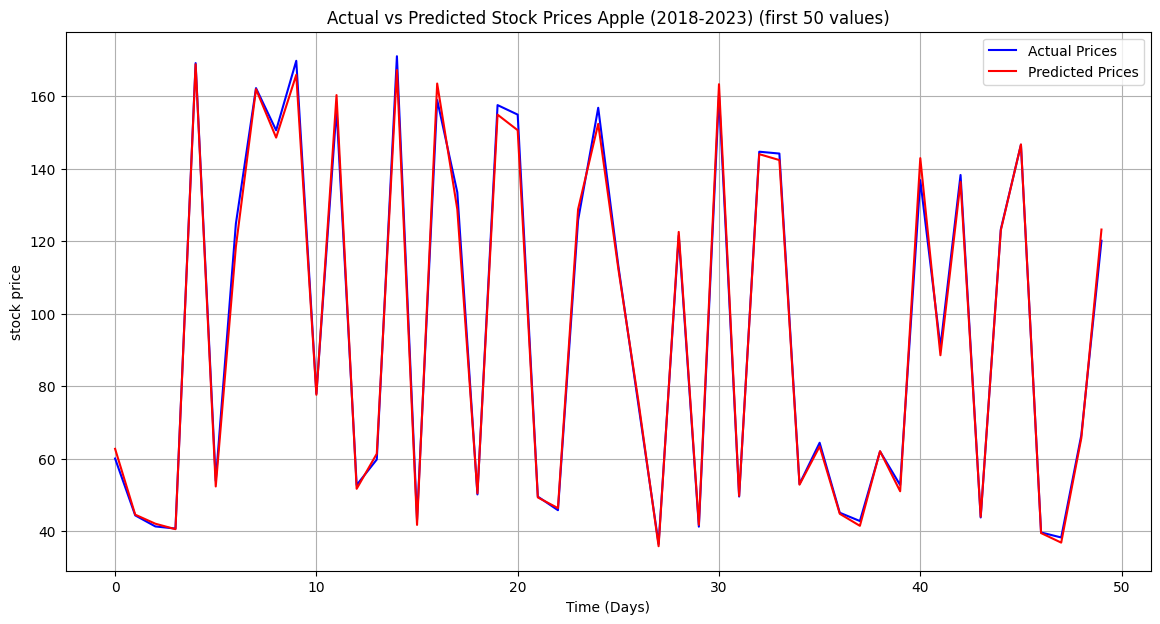

In [6]:
# Visualizing the results
import matplotlib.pyplot as plt

# Visualizing the results for the first model
plt.figure(figsize=(14,7))
plt.plot( y_test_2018_2023.values[:50], label='Actual Prices', color='blue')
plt.plot( y_pred_1[:50], label='Predicted Prices', color='red')
plt.title('Actual vs Predicted Stock Prices Apple (2018-2023) (first 50 values)')
plt.xlabel('Time (Days)')
plt.ylabel('stock price')
plt.legend()
plt.grid(True)
plt.show()


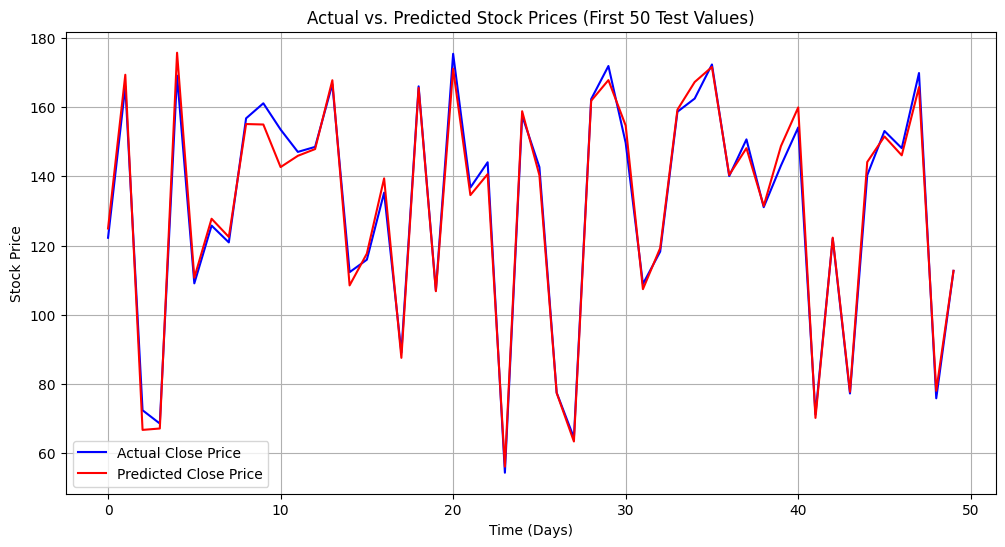

In [7]:
# Visualizing the results for the second model
plt.figure(figsize=(12, 6))
plt.plot(y_test_2020_2023.values[:50], label='Actual Close Price', color='blue')
plt.plot(y_pred_2[:50], label='Predicted Close Price', color='red')
plt.title('Actual vs. Predicted Stock Prices (First 50 Test Values)')
plt.xlabel('Time (Days)')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

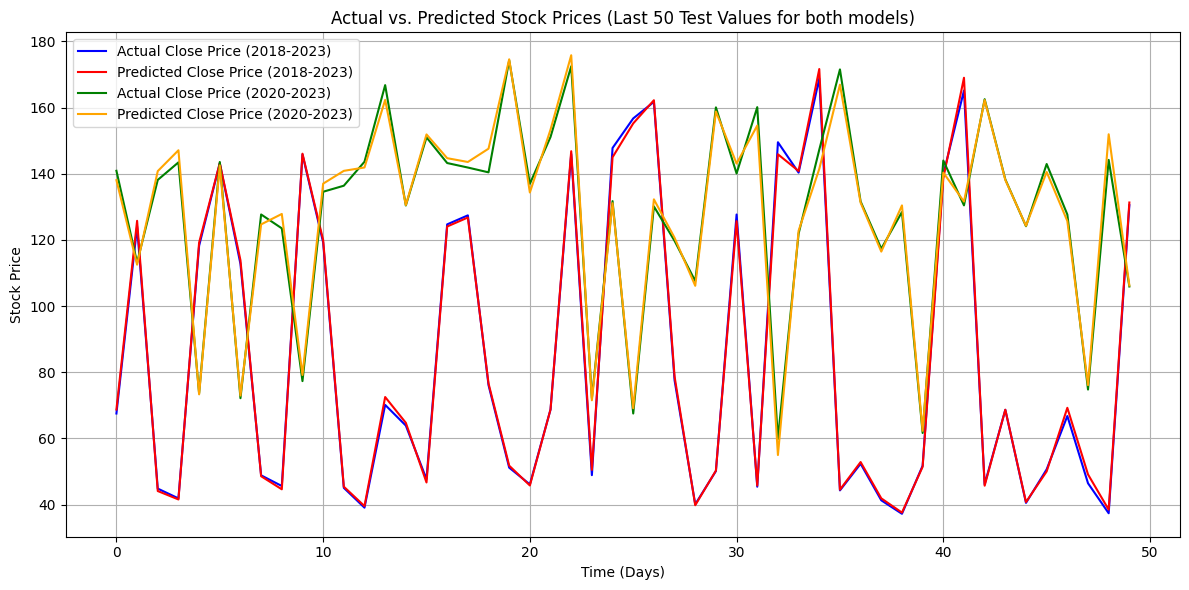

In [8]:
# Lets plot last 50 values for both models in one plot 
plt.figure(figsize=(12, 6))
plt.plot(y_test_2018_2023.values[-50:], label='Actual Close Price (2018-2023)', color='blue')
plt.plot(y_pred_1[-50:], label='Predicted Close Price (2018-2023)', color='red')
plt.plot(y_test_2020_2023.values[-50:], label='Actual Close Price (2020-2023)', color='green')
plt.plot(y_pred_2[-50:], label='Predicted Close Price (2020-2023)', color='orange')

plt.title('Actual vs. Predicted Stock Prices (Last 50 Test Values for both models)')
plt.xlabel('Time (Days)')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

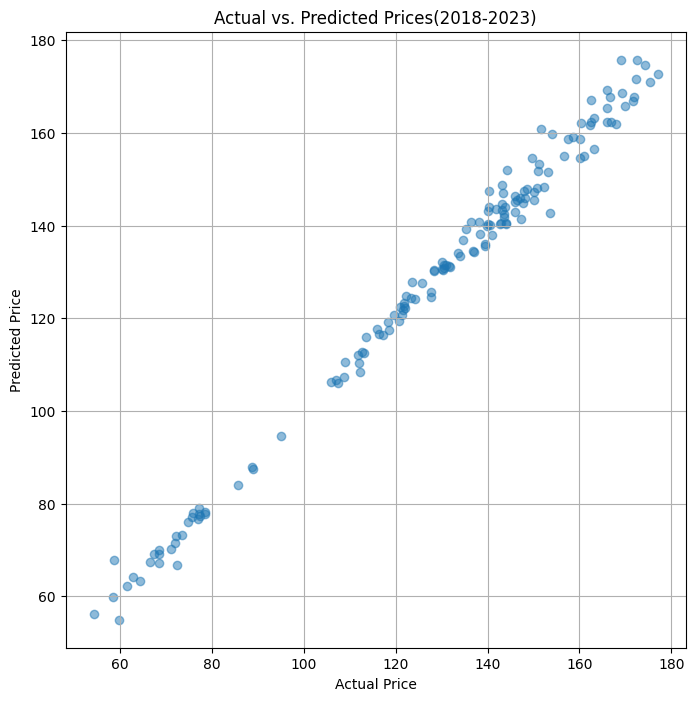

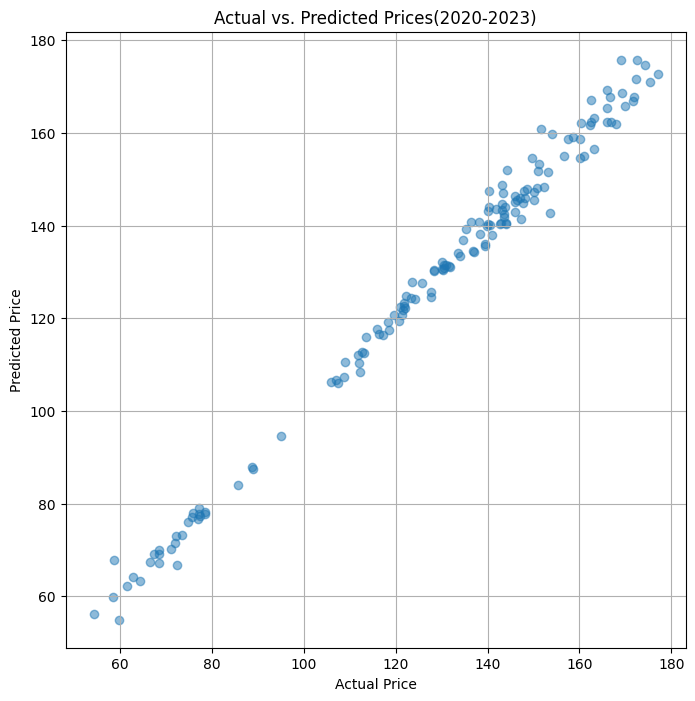

In [9]:
#tscatter plots for actual vs predicted prices for both models in 2018-2023 and 2020-2023
plt.figure(figsize=(8, 8))
plt.scatter(y_test_2020_2023, y_pred_2, alpha=0.5)
plt.title('Actual vs. Predicted Prices(2018-2023)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)


plt.figure(figsize=(8, 8))
plt.scatter(y_test_2020_2023, y_pred_2, alpha=0.5)
plt.title('Actual vs. Predicted Prices(2020-2023)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.show()

### Added more features for checking the model 

In [10]:
X_2018_2023_features = data_2018_2023[['Open', 'High', 'Low', 'Close', 'Volume']]
X_2020_2023_features = data_2020_2023[['Open', 'High', 'Low', 'Close', 'Volume']]

Y_2018_2023 = data_2018_2023['Next_Close']
Y_2020_2023 = data_2020_2023['Next_Close']

# lets increase the features by adding more features like 'Open', 'High', 'Low', and 'Volume'
X_train_2018_2023_features, X_test_2018_2023_features, y_train_2018_2023, y_test_2018_2023 = train_test_split(X_2018_2023_features, Y_2018_2023, test_size=0.2, random_state=42)
X_train_2020_2023_features, X_test_2020_2023_features, y_train_2020_2023, y_test_2020_2023 = train_test_split(X_2020_2023_features, Y_2020_2023, test_size=0.2, random_state=42)

# Now we can train the model again with these new features
model_1_features = LinearRegression()
model_2_features = LinearRegression()

model_1_features.fit(X_train_2018_2023_features, y_train_2018_2023)
model_2_features.fit(X_train_2020_2023_features, y_train_2020_2023) 

# Make predictions with the new model
y_pred_1_features = model_1_features.predict(X_test_2018_2023_features)
y_pred_2_features = model_2_features.predict(X_test_2020_2023_features)

# evalutae the m=new model 
mse_1_features = mean_squared_error(y_test_2018_2023, y_pred_1_features)
mse_2_features = mean_squared_error(y_test_2020_2023, y_pred_2_features)

print(f"\nModel Performance with additional features:")
print(f"Mean Squared Error (MSE) model 1 (2018-2023) with features: {mse_1_features:.2f}")
print(f"Mean Squared Error (MSE) model 2 (2020-2023) with features: {mse_2_features:.2f}")

print(f"Mean Squared Error (MSE) model 1 (2018-2023) without features: {mse_1:.2f}")
print(f"Mean Squared Error (MSE) model 2 (2020-2023) without features: {mse_2:.2f}")


Model Performance with additional features:
Mean Squared Error (MSE) model 1 (2018-2023) with features: 4.24
Mean Squared Error (MSE) model 2 (2020-2023) with features: 8.93
Mean Squared Error (MSE) model 1 (2018-2023) without features: 4.21
Mean Squared Error (MSE) model 2 (2020-2023) without features: 8.97


### Using different models ( ex: Random forest, svr) to predict

1. Random Forest : The Random Forest Regressor is an ensemble model, which means it's made up of many smaller models working together. Specifically, it builds a "forest" of many individual decision trees. Each tree is trained on a random subset of the data and features. When it's time to make a prediction, it averages the results from all the trees. 
    - why this approach : The approach is powerfull because it is excellent at catching non-linear relationships in the data, hence for data like finances this is a popular choices.

2. Support Vector Machine (SVR): The Support Vector Regressor works by finding the best-fit line or curve (a "hyperplane") to fit the data, with the goal of keeping as many data points as possible within a certain margin. It essentially focuses on the data points that are hardest to fit (the "support vectors"), making it very good at handling outliers and noisy data.
    - why this approach: since stock market is usually pretty volatile, and can have sudden, unpredictable swings, SVR's robustness to noise can make it a strong option for forecasting.
    - Important points to remember: The problem is that Support Vector Machines are highly sensitive to the scale of the input features. Our stock data has features with very different scales: the 'Open', 'High', and 'Low' prices are large numbers, while the 'Volume' can be in the millions or even billions. The SVR model mistakenly gives more importance to the features with larger values, which completely throws off its predictions.

In [11]:
# Training with different models 
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Training the Random Forest model
rf_model_1 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_2 = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model_1.fit(X_train_2018_2023_features, y_train_2018_2023)
rf_model_2.fit(X_train_2020_2023_features, y_train_2020_2023)

y_pred_rf_1 = rf_model_1.predict(X_test_2018_2023_features)
y_pred_rf_2 = rf_model_2.predict(X_test_2020_2023_features)

mse_rf_1 = mean_squared_error(y_test_2018_2023, y_pred_rf_1)
mse_rf_2 = mean_squared_error(y_test_2020_2023, y_pred_rf_2)

print(f"\nRandom Forest Model Performance:")
print(f"Mean Squared Error (MSE) model 1 (2018-2023) with Random Forest: {mse_rf_1:.2f}")
print(f"Mean Squared Error (MSE) model 2 (2020-2023) with Random Forest: {mse_rf_2:.2f}")


# Training the Support Vector Regression model
# First, we need to scale the features for SVR 
svr_model_1 = SVR(kernel='rbf')
svr_model_2 = SVR(kernel='rbf')

svr_model_1.fit(X_train_2018_2023_features, y_train_2018_2023)
svr_model_2.fit(X_train_2020_2023_features, y_train_2020_2023)

y_pred_svr_1 = svr_model_1.predict(X_test_2018_2023_features)
y_pred_svr_2 = svr_model_2.predict(X_test_2020_2023_features)

mse_svr_1 = mean_squared_error(y_test_2018_2023, y_pred_svr_1)
mse_svr_2 = mean_squared_error(y_test_2020_2023, y_pred_svr_2)

print(f"\nSupport Vector Regression Model Performance:")
print(f"Mean Squared Error (MSE) model 1 (2018-2023) with SVR without scaling: {mse_svr_1:.2f}")
print(f"Mean Squared Error (MSE) model 2 (2020-2023) with SVR without scaling: {mse_svr_2:.2f}")

# scaling the features for SVR
scaler_1 = StandardScaler()
X_train_2018_2023_scaled = scaler_1.fit_transform(X_train_2018_2023_features)
X_test_2018_2023_scaled = scaler_1.transform(X_test_2018_2023_features)

scaler_2 = StandardScaler()
X_train_2020_2023_scaled = scaler_2.fit_transform(X_train_2020_2023_features)
X_test_2020_2023_scaled = scaler_2.transform(X_test_2020_2023_features)

# Training the SVR model with scaled features
svr_model_1_scaled = SVR(kernel='linear')
svr_model_2_scaled = SVR(kernel='linear')

svr_model_1_scaled.fit(X_train_2018_2023_scaled, y_train_2018_2023)
svr_model_2_scaled.fit(X_train_2020_2023_scaled, y_train_2020_2023)

y_pred_svr_1_scaled = svr_model_1_scaled.predict(X_test_2018_2023_scaled)
y_pred_svr_2_scaled = svr_model_2_scaled.predict(X_test_2020_2023_scaled)

mse_svr_1_scaled = mean_squared_error(y_test_2018_2023, y_pred_svr_1_scaled)
mse_svr_2_scaled = mean_squared_error(y_test_2020_2023, y_pred_svr_2_scaled)

print(f"\nSupport Vector Regression Model Performance with scaling:")
print(f"Mean Squared Error (MSE) model 1 (2018-2023) with SVR with scaling: {mse_svr_1_scaled:.2f}")
print(f"Mean Squared Error (MSE) model 2 (2020-2023) with SVR with scaling: {mse_svr_2_scaled:.2f}")



Random Forest Model Performance:
Mean Squared Error (MSE) model 1 (2018-2023) with Random Forest: 4.70
Mean Squared Error (MSE) model 2 (2020-2023) with Random Forest: 9.00

Support Vector Regression Model Performance:
Mean Squared Error (MSE) model 1 (2018-2023) with SVR without scaling: 1821.70
Mean Squared Error (MSE) model 2 (2020-2023) with SVR without scaling: 788.05

Support Vector Regression Model Performance with scaling:
Mean Squared Error (MSE) model 1 (2018-2023) with SVR with scaling: 5.28
Mean Squared Error (MSE) model 2 (2020-2023) with SVR with scaling: 9.18


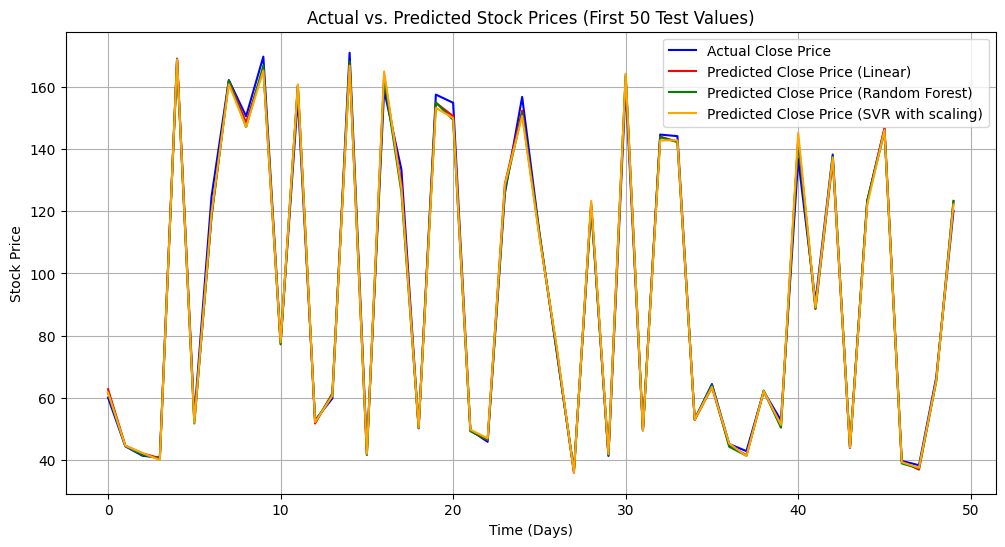

In [12]:
# Graphical representation of the predictions for the 20128-2023 linear, randome forest and svr models
plt.figure(figsize=(12, 6))
plt.plot(y_test_2018_2023.values[:50], label='Actual Close Price', color='blue')
plt.plot(y_pred_1[:50], label='Predicted Close Price (Linear)', color='red')
plt.plot(y_pred_rf_1[:50], label='Predicted Close Price (Random Forest)', color='green')
plt.plot(y_pred_svr_1_scaled[:50], label='Predicted Close Price (SVR with scaling)', color='orange')

plt.title('Actual vs. Predicted Stock Prices (First 50 Test Values)')
plt.xlabel('Time (Days)')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

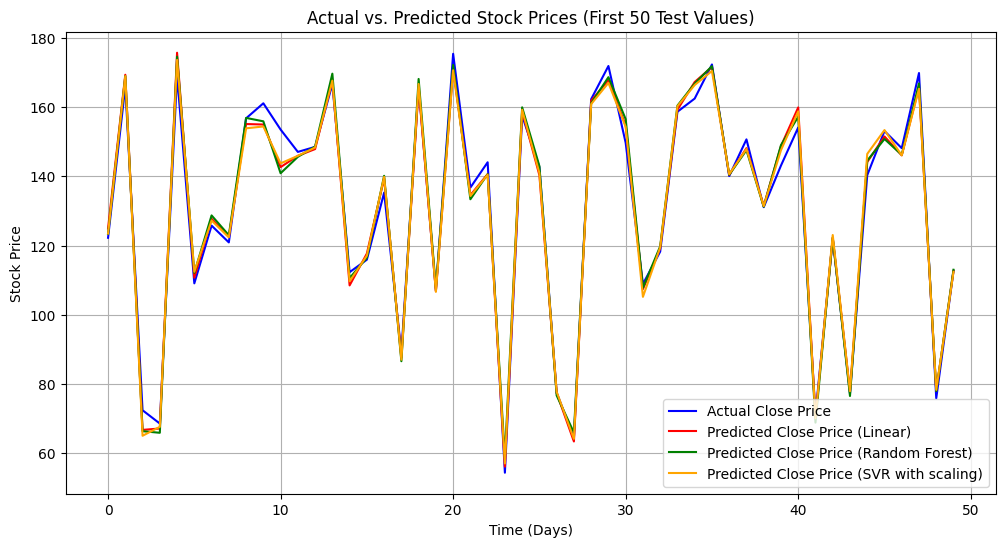

In [18]:
# Graphical representation of the predictions for 2020-2023 linear, randome forest and svr models
plt.figure(figsize=(12, 6))
plt.plot(y_test_2020_2023.values[:50], label='Actual Close Price', color='blue')
plt.plot(y_pred_2[:50], label='Predicted Close Price (Linear)', color='red')
plt.plot(y_pred_rf_2[:50], label='Predicted Close Price (Random Forest)', color='green')
plt.plot(y_pred_svr_2_scaled[:50], label='Predicted Close Price (SVR with scaling)', color='orange')

plt.title('Actual vs. Predicted Stock Prices (First 50 Test Values)')
plt.xlabel('Time (Days)')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()